In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

In [96]:
sns.set()
df = pd.read_csv('seeds_dataset.csv')
df

,a,p,c,lk,wk,ac,lkg,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,Canadian
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,Canadian
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,Canadian
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,Canadian


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       210 non-null    float64
 1   p       210 non-null    float64
 2   c       210 non-null    float64
 3   lk      210 non-null    float64
 4   wk      210 non-null    float64
 5   ac      210 non-null    float64
 6   lkg     210 non-null    float64
 7   class   210 non-null    object 
dtypes: float64(7), object(1)
memory usage: 13.2+ KB


In [98]:
df.describe()

,a,p,c,lk,wk,ac,lkg
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [99]:
df['class'].value_counts()

Kama        70
Rosa        70
Canadian    70
Name: class, dtype: int64

/home/mrwl/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Elementos por clase'}, xlabel='class', ylabel='count'>

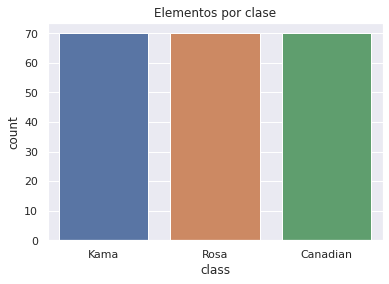

In [100]:
plt.title('Elementos por clase')
sns.countplot(df['class'])

In [101]:
df.describe(include='all')

,a,p,c,lk,wk,ac,lkg,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kama
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,NaN
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,NaN
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,NaN
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,NaN
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,NaN
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,NaN


In [ ]:
sns.pairplot(df, hue="class")
sns.pairplot()

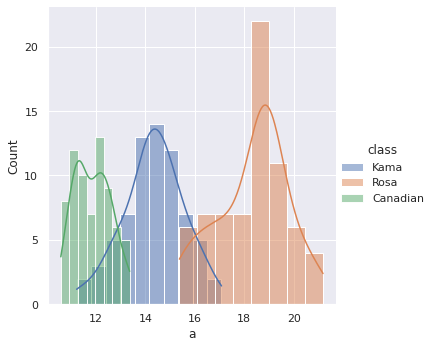

In [103]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "a", kde = True)\
.add_legend()
plt.show()


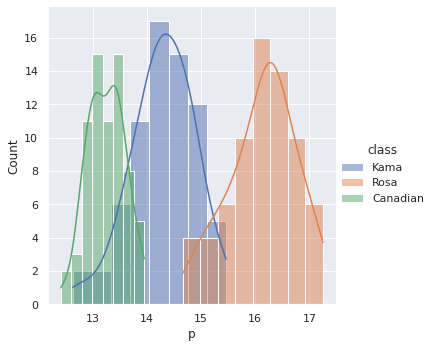

In [104]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "p", kde = True)\
.add_legend()
plt.show()

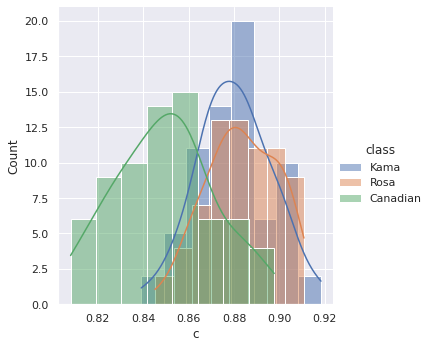

In [105]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "c", kde = True)\
.add_legend()
plt.show()

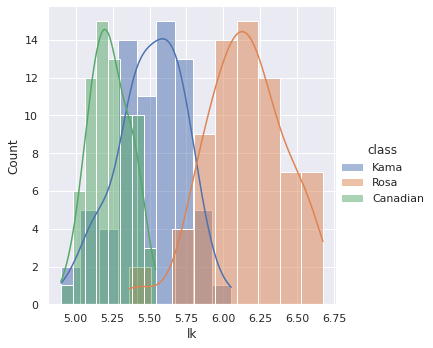

In [106]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "lk", kde = True)\
.add_legend()
plt.show()

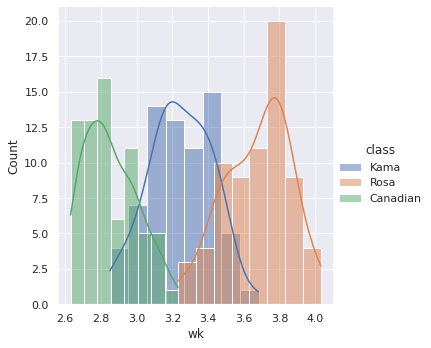

In [107]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "wk", kde = True)\
.add_legend()
plt.show()

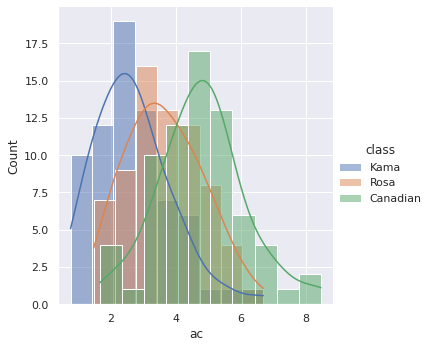

In [108]:

sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "ac", kde = True)\
.add_legend()
plt.show()

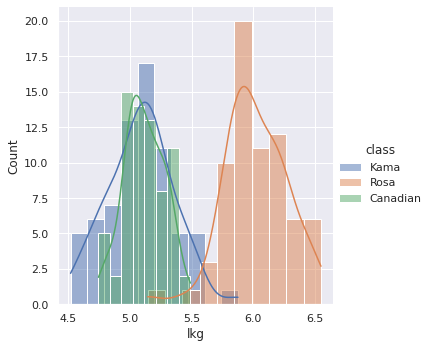

In [109]:
sns.FacetGrid(df, hue = "class", height=5)\
.map(sns.histplot, "lkg", kde = True)\
.add_legend()
plt.show()

In [111]:
regresor = LinearRegression()

In [112]:
df.corr()

,a,p,c,lk,wk,ac,lkg
a,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
p,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
c,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
lk,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
wk,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
ac,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
lkg,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

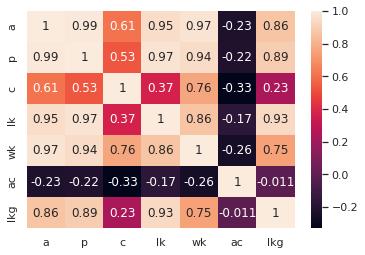

In [114]:
sns.heatmap(df.corr(), annot=True)

In [113]:
df.cov()

,a,p,c,lk,wk,ac,lkg
a,8.466351,3.778443,0.041823,1.224704,1.066911,-1.004356,1.235133
p,3.778443,1.705528,0.016332,0.562666,0.466065,-0.426766,0.571753
c,0.041823,0.016332,0.000558,0.003852,0.006798,-0.011777,0.002634
lk,1.224704,0.562666,0.003852,0.196305,0.143992,-0.114290,0.203125
wk,1.066911,0.466065,0.006798,0.143992,0.142668,-0.146543,0.139068
ac,-1.004356,-0.426766,-0.011777,-0.114290,-0.146543,2.260684,-0.008187
lkg,1.235133,0.571753,0.002634,0.203125,0.139068,-0.008187,0.241553


<AxesSubplot:>

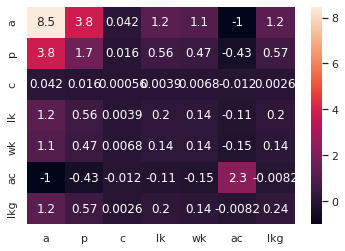

In [115]:
sns.heatmap(df.cov(), annot=True)

In [110]:
clas = []
for i in df["a"]:
    if(i <= 13):
        clas.append('Canadian')
    elif(i <= 16):
        clas.append('Kama')
    else:
        clas.append('Rosa')

aciertos = sum(x == y for x, y in zip(df["class"], clas))
print("Rendimiento: ", aciertos/len(df["class"]) * 100,"%")

Rendimiento:  86.66666666666667 %
